In [59]:
pip install statsmodels

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/geopandas-0.9.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 14.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install pygam

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/geopandas-0.9.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 15.2 MB/s eta 0:00:0000:010:01m
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.0
    Uninstalling scipy-1.13.0:
      Successfully uninstalled scipy-1.13.0

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from statsmodels.api import GLM, families
import pygam 


First dataset for wildfires found here: https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

In [7]:
fire_data = pd.read_csv('./California_Fire_Perimeters_5422071188818403882.csv')
display(fire_data)

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,11.0,...,1.0,109.602300,NaN,NaN,NaN,NaN,NaN,2020.0,7.331347e+05,4179.743142
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,6/1/2020 12:00:00 AM,6/4/2020 12:00:00 AM,2.0,...,1.0,685.585000,NaN,NaN,NaN,NaN,NaN,2020.0,4.578172e+06,12399.375391
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,8/10/2020 12:00:00 AM,8/11/2020 12:00:00 AM,14.0,...,1.0,27.300480,NaN,NaN,NaN,NaN,NaN,2020.0,1.823876e+05,2119.194120
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,3/31/2020 12:00:00 AM,4/1/2020 12:00:00 AM,9.0,...,1.0,12.931550,NaN,NaN,NaN,NaN,NaN,2020.0,8.667945e+04,2029.524881
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,4/14/2020 12:00:00 AM,4/19/2020 12:00:00 AM,18.0,...,1.0,10.315960,NaN,NaN,NaN,NaN,NaN,2020.0,7.017913e+04,1342.742903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,43907,2022.0,CA,LRA,VNC,CHAMBERS,00023419,3/16/2022 12:00:00 AM,3/17/2022 12:00:00 AM,14.0,...,1.0,1.547286,NaN,NaN,NaN,B541FD2D-0474-47CF-AF6C-C4576E03A590,NaN,2020.0,9.217691e+03,537.691347
21922,43908,2022.0,CA,LRA,VNC,MOON,00073287,8/14/2022 12:00:00 AM,8/14/2022 12:00:00 AM,14.0,...,1.0,1.424808,NaN,NaN,NaN,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,NaN,2020.0,8.444238e+03,452.799309
21923,43909,2022.0,CA,USF,SHF,TEXAS,00000953,9/9/2022 12:00:00 AM,9/10/2022 12:00:00 AM,14.0,...,1.0,12.912490,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,NaN,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,2020.0,8.985026e+04,2061.550880
21924,43910,2022.0,CA,USF,KNF,ALEX,00006290,7/31/2022 12:00:00 AM,8/3/2022 12:00:00 AM,14.0,...,1.0,150.403500,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,NaN,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,2020.0,1.100802e+06,6500.414625


In [8]:
fire_location = gpd.read_file('./fire_shape_data/California_Fire_Perimeters_(all).shp')
fire_location

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18,2020-06-23,11,1,1,109.60200,None,None,None,None,None,2020,"POLYGON ((-13508443.877 4705925.941, -13508437..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01,2020-06-04,2,1,1,685.58500,None,None,None,None,None,2020,"POLYGON ((-13508927.937 4695976.336, -13508919..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10,2020-08-11,14,1,1,27.30050,None,None,None,None,None,2020,"POLYGON ((-13506766.482 4699576.903, -13506741..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31,2020-04-01,9,1,1,12.93150,None,None,None,None,None,2020,"POLYGON ((-13500068.676 4716384.732, -13500054..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14,2020-04-19,18,1,1,10.31600,None,None,None,None,None,2020,"POLYGON ((-13503128.528 4791692.607, -13503101..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,2022,CA,LRA,VNC,CHAMBERS,00023419,2022-03-16,2022-03-17,14,1,1,1.54729,None,None,None,B541FD2D-0474-47CF-AF6C-C4576E03A590,None,2020,"POLYGON ((-13237822.286 4081383.153, -13237822..."
21922,2022,CA,LRA,VNC,MOON,00073287,2022-08-14,2022-08-14,14,1,1,1.42481,None,None,None,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,None,2020,"POLYGON ((-13241105.999 4051757.539, -13241098..."
21923,2022,CA,USF,SHF,TEXAS,00000953,2022-09-09,2022-09-10,14,6,1,12.91250,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,None,None,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,None,2020,"POLYGON ((-13703427.459 4905142.122, -13703465..."
21924,2022,CA,USF,KNF,ALEX,00006290,2022-07-31,2022-08-03,14,3,1,150.40400,E9A30E52-C8E6-4AA5-B7D8-967923865340,None,None,E9A30E52-C8E6-4AA5-B7D8-967923865340,None,2020,"MULTIPOLYGON (((-13687209.245 5152398.057, -13..."


In [9]:
print(len(fire_location["FIRE_NAME"]))
print(len(fire_location["FIRE_NAME"].unique()))
print(len(fire_data))

21926
9036
21926


In [10]:
merged_fire = pd.merge(fire_data, fire_location, left_index=True, right_index=True, suffixes=('', '_drop'))
merged_fire = merged_fire.filter(regex='^(?!.*_drop)')

print(merged_fire.columns)

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry'],
      dtype='object')


In [11]:
merged_fire

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,COMPLEX_NAME,COMPLEX_INCNUM,IRWINID,FIRE_NUM,DECADES,Shape__Area,Shape__Length,COMPLEX_NA,COMPLEX_IN,geometry
0,21440,2020.0,CA,CDF,NEU,NELSON,00013212,6/18/2020 12:00:00 AM,6/23/2020 12:00:00 AM,11.0,...,NaN,NaN,NaN,NaN,2020.0,7.331347e+05,4179.743142,None,None,"POLYGON ((-13508443.877 4705925.941, -13508437..."
1,21441,2020.0,CA,CDF,NEU,AMORUSO,00011799,6/1/2020 12:00:00 AM,6/4/2020 12:00:00 AM,2.0,...,NaN,NaN,NaN,NaN,2020.0,4.578172e+06,12399.375391,None,None,"POLYGON ((-13508927.937 4695976.336, -13508919..."
2,21442,2020.0,CA,CDF,NEU,ATHENS,00018493,8/10/2020 12:00:00 AM,8/11/2020 12:00:00 AM,14.0,...,NaN,NaN,NaN,NaN,2020.0,1.823876e+05,2119.194120,None,None,"POLYGON ((-13506766.482 4699576.903, -13506741..."
3,21443,2020.0,CA,CDF,NEU,FLEMING,00007619,3/31/2020 12:00:00 AM,4/1/2020 12:00:00 AM,9.0,...,NaN,NaN,NaN,NaN,2020.0,8.667945e+04,2029.524881,None,None,"POLYGON ((-13500068.676 4716384.732, -13500054..."
4,21444,2020.0,CA,CDF,NEU,MELANESE,00008471,4/14/2020 12:00:00 AM,4/19/2020 12:00:00 AM,18.0,...,NaN,NaN,NaN,NaN,2020.0,7.017913e+04,1342.742903,None,None,"POLYGON ((-13503128.528 4791692.607, -13503101..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21921,43907,2022.0,CA,LRA,VNC,CHAMBERS,00023419,3/16/2022 12:00:00 AM,3/17/2022 12:00:00 AM,14.0,...,NaN,NaN,B541FD2D-0474-47CF-AF6C-C4576E03A590,NaN,2020.0,9.217691e+03,537.691347,None,None,"POLYGON ((-13237822.286 4081383.153, -13237822..."
21922,43908,2022.0,CA,LRA,VNC,MOON,00073287,8/14/2022 12:00:00 AM,8/14/2022 12:00:00 AM,14.0,...,NaN,NaN,EE538AD9-C557-40F2-9EDD-56C345B4E7FD,NaN,2020.0,8.444238e+03,452.799309,None,None,"POLYGON ((-13241105.999 4051757.539, -13241098..."
21923,43909,2022.0,CA,USF,SHF,TEXAS,00000953,9/9/2022 12:00:00 AM,9/10/2022 12:00:00 AM,14.0,...,NaN,NaN,BA5FDCF1-23D0-43FD-8DA9-3FF21A5C0F81,NaN,2020.0,8.985026e+04,2061.550880,None,None,"POLYGON ((-13703427.459 4905142.122, -13703465..."
21924,43910,2022.0,CA,USF,KNF,ALEX,00006290,7/31/2022 12:00:00 AM,8/3/2022 12:00:00 AM,14.0,...,NaN,NaN,E9A30E52-C8E6-4AA5-B7D8-967923865340,NaN,2020.0,1.100802e+06,6500.414625,None,None,"MULTIPOLYGON (((-13687209.245 5152398.057, -13..."


In [12]:
merged_fire.columns

Index(['OBJECTID', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'COMPLEX_INCNUM', 'IRWINID',
       'FIRE_NUM', 'DECADES', 'Shape__Area', 'Shape__Length', 'COMPLEX_NA',
       'COMPLEX_IN', 'geometry'],
      dtype='object')

In [13]:
len(merged_fire["FIRE_NUM"].unique())

3173

Second dataset for wildfires is found here: https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020?select=California_Fire_Incidents.csv

In [18]:
#second_fire = pd.read_csv("./California_Fire_Incidents.csv")
#display(second_fire)

In [19]:
#second_fire.columns

In [20]:
#second_fire["Name"]

In [21]:
merged_fire["ALARM_DATE"]

0        6/18/2020 12:00:00 AM
1         6/1/2020 12:00:00 AM
2        8/10/2020 12:00:00 AM
3        3/31/2020 12:00:00 AM
4        4/14/2020 12:00:00 AM
                 ...          
21921    3/16/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923     9/9/2022 12:00:00 AM
21924    7/31/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: ALARM_DATE, Length: 21926, dtype: object

In [22]:
merged_fire["YEAR_"].unique()

array([2020., 2007., 2006., 2005., 2004., 1944., 1915., 1917., 1960.,
       1921., 1923., 1970., 1920., 1979., 1990., 1998., 1966., 1942.,
       1941., 1982., 1973., 1977., 1953., 1946., 1955., 1931., 1949.,
       1964., 1948., 1958., 1972., 1916., 1974., 1950., 1930., 1971.,
       1924., 1926., 1927., 1945., 1952., 1911., 1929.,   nan, 1997.,
       1984., 1910., 1951., 1956., 1981., 1909., 1935., 1936., 1961.,
       1919., 1925., 1928., 1918., 1940., 1933., 1968., 1999., 1943.,
       1914., 1922., 1975., 1932., 1912., 1978., 1983., 1913., 1947.,
       1934., 1937., 1938., 1967., 1976., 2000., 1994., 1878., 1895.,
       1896., 1898., 1907., 1908., 1986., 1980., 1954., 1962., 1959.,
       1900., 1957., 2003., 1969., 1988., 1996., 1991., 1992., 1995.,
       1987., 1939., 1903., 1905., 1906., 1985., 2001., 1989., 2002.,
       1965., 1993., 1963., 2008., 2010., 2016., 2012., 2014., 1902.,
       2009., 2011., 2013., 2015., 2017., 2018., 2019., 2021., 2022.])

In [24]:
#second_fire["ArchiveYear"].unique()

Might not be worth using because only 2 years match with the pm2.5 dataset.

The third dataset can be found here: https://www.kaggle.com/datasets/avkashchauhan/california-wildfire-dataset-from-2000-2021/data

In [25]:
third_fire = pd.read_csv("./ca_daily_fire_2000_2021-v2.csv")
display(third_fire)

,latitude,longitude,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month
0,32.4646,-114.6906,2011-06-29,Terra,MODIS,91.1,0,315.7,84,2011,6
1,32.4768,-114.6785,2011-10-11,Terra,MODIS,96.2,0,313.7,100,2011,10
2,32.4937,-114.7856,2013-02-06,Terra,MODIS,26.9,0,296.1,65,2013,2
3,32.4987,-114.7985,2010-02-04,Terra,MODIS,22.2,0,282.9,62,2010,2
4,32.5006,-114.7929,2009-07-08,Aqua,MODIS,172.0,0,316.4,78,2009,7
...,...,...,...,...,...,...,...,...,...,...,...
221178,41.9998,-121.0237,2014-11-12,Aqua,MODIS,24.6,0,274.4,77,2014,11
221179,41.9998,-120.7090,2012-08-13,Terra,MODIS,74.1,0,310.7,97,2012,8
221180,41.9998,-114.9167,2007-07-20,Aqua,MODIS,35.7,0,321.8,91,2007,7
221181,41.9999,-123.5675,2018-07-30,Terra,MODIS,18.2,0,295.8,62,2018,7


In [26]:
third_fire["year"].unique()

array([2011, 2013, 2010, 2009, 2004, 2002, 2018, 2007, 2005, 2008, 2014,
       2020, 2012, 2006, 2003, 2016, 2017, 2019, 2001, 2015, 2000])

In [27]:
third_fire.columns

Index(['latitude', 'longitude', 'acq_date', 'satellite', 'instrument', 'frp',
       'type', 'bright_t31', 'confidence', 'year', 'month'],
      dtype='object')

In [28]:
print(len(third_fire["acq_date"].unique()))
print(len(third_fire["acq_date"]))

6352
221183


In [29]:
merged_fire["ALARM_DATE"]

0        6/18/2020 12:00:00 AM
1         6/1/2020 12:00:00 AM
2        8/10/2020 12:00:00 AM
3        3/31/2020 12:00:00 AM
4        4/14/2020 12:00:00 AM
                 ...          
21921    3/16/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923     9/9/2022 12:00:00 AM
21924    7/31/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: ALARM_DATE, Length: 21926, dtype: object

In [30]:
merged_fire["CONT_DATE"]

0        6/23/2020 12:00:00 AM
1         6/4/2020 12:00:00 AM
2        8/11/2020 12:00:00 AM
3         4/1/2020 12:00:00 AM
4        4/19/2020 12:00:00 AM
                 ...          
21921    3/17/2022 12:00:00 AM
21922    8/14/2022 12:00:00 AM
21923    9/10/2022 12:00:00 AM
21924     8/3/2022 12:00:00 AM
21925    7/25/2022 12:00:00 AM
Name: CONT_DATE, Length: 21926, dtype: object

In [31]:
# Convert merged_fire to a GeoDataFrame
merged_fire_geo = gpd.GeoDataFrame(merged_fire, geometry='geometry')

# Convert third_fire to a GeoDataFrame
third_fire_geo = gpd.GeoDataFrame(third_fire, geometry=gpd.points_from_xy(third_fire['longitude'], third_fire['latitude']))

# Set the coordinate reference system (CRS) for both GeoDataFrames
merged_fire_geo.crs = {'init': 'epsg:4326'}
third_fire_geo.crs = {'init': 'epsg:4326'}

# Convert 'ALARM_DATE', 'CONT_DATE', and 'acq_date' to datetime if not already
merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
merged_fire_geo['CONT_DATE'] = pd.to_datetime(merged_fire_geo['CONT_DATE'], errors='coerce')
third_fire_geo['acq_date'] = pd.to_datetime(third_fire_geo['acq_date'])

# Perform the spatial join with a distance tolerance
distance_tolerance = 0.1  # Adjust the distance tolerance as needed (in degrees)
merged_df = gpd.sjoin_nearest(merged_fire_geo, third_fire_geo, how='inner',max_distance=distance_tolerance, distance_col='distance')
merged_df

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_4251/4084782204.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_4251/4084782204.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,distance


In [32]:
merged_df = merged_df[(merged_df['distance'] <= distance_tolerance) &
                      (merged_df['acq_date'] >= merged_df['ALARM_DATE']) &
                      (merged_df['acq_date'] <= merged_df['CONT_DATE'])]
# Print the merged DataFrame
print(merged_df)

Empty GeoDataFrame
Columns: [OBJECTID, YEAR_, STATE, AGENCY, UNIT_ID, FIRE_NAME, INC_NUM, ALARM_DATE, CONT_DATE, CAUSE, C_METHOD, OBJECTIVE, GIS_ACRES, COMMENTS, COMPLEX_NAME, COMPLEX_INCNUM, IRWINID, FIRE_NUM, DECADES, Shape__Area, Shape__Length, COMPLEX_NA, COMPLEX_IN, geometry, index_right, latitude, longitude, acq_date, satellite, instrument, frp, type, bright_t31, confidence, year, month, distance]
Index: []

[0 rows x 37 columns]


In [34]:
#second_fire.columns

In [35]:
# Convert merged_fire to a GeoDataFrame
merged_fire_geo = gpd.GeoDataFrame(merged_fire, geometry='geometry')

# Convert third_fire to a GeoDataFrame
third_fire_geo = gpd.GeoDataFrame(third_fire, geometry=gpd.points_from_xy(third_fire['longitude'], third_fire['latitude']))

# Set the coordinate reference system (CRS) for both GeoDataFrames
merged_fire_geo.crs = {'init': 'epsg:4326'}
third_fire_geo.crs = {'init': 'epsg:4326'}

# Convert 'ALARM_DATE', 'CONT_DATE', and 'acq_date' to datetime if not already
merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
merged_fire_geo['CONT_DATE'] = pd.to_datetime(merged_fire_geo['CONT_DATE'], errors='coerce')
third_fire_geo['acq_date'] = pd.to_datetime(third_fire_geo['acq_date'])

# Perform the spatial join with a distance tolerance
distance_tolerance = 0.1  # Adjust the distance tolerance as needed (in degrees)
merged_df = gpd.sjoin_nearest(merged_fire_geo, third_fire_geo, how='inner',max_distance=distance_tolerance, distance_col='distance')
merged_df

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_4251/4084782204.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_fire_geo['ALARM_DATE'] = pd.to_datetime(merged_fire_geo['ALARM_DATE'], errors='coerce')
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_4251/4084782204.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,acq_date,satellite,instrument,frp,type,bright_t31,confidence,year,month,distance


In [57]:
polygons = merged_fire["geometry"][0]
coordinates = list(polygons.exterior.coords)
latitude_longitude_pairs = [(lat, lon) for lon, lat in coordinates]
x = latitude_longitude_pairs[0][0]
y = latitude_longitude_pairs[0][1]
print(x, y)


4705925.940700002 -13508443.8772


In [58]:
from pyproj import Proj, transform

source_crs = 'EPSG:2228'
target_crs = 'EPSG:4326'
projector = Proj(init=source_crs), Proj(init=target_crs)

longitude, latitude = transform(projector[0], projector[1], x, y)
longitude, latitude

/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/homebrew/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/19/r56dh6d15dvbmqph7x4f4r3m0000gn/T/ipykernel_4251/3743674862.py:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
 

(-123.06650331111025, -3.277361125156069)

In [64]:
pm = pd.read_csv("./Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014_20240413.csv")

In [68]:
pm

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,30DEC2011,48,48399,48399950100,31.96861,-99.99100,7.590561,5.439812
1,2011,30DEC2011,48,48399,48399950200,31.95574,-99.96764,7.660033,5.666294
2,2011,30DEC2011,48,48399,48399950500,31.65529,-100.05925,7.355021,5.490203
3,2011,30DEC2011,48,48399,48399950600,31.76387,-99.89893,7.436393,5.247210
4,2011,30DEC2011,48,48401,48401950100,32.31673,-94.60574,11.107991,6.297006
...,...,...,...,...,...,...,...,...,...
105605458,2011,30DEC2011,48,48397,48397040402,32.96046,-96.38467,13.946068,5.894453
105605459,2011,30DEC2011,48,48397,48397040503,32.88666,-96.44820,13.918961,5.645451
105605460,2011,30DEC2011,48,48397,48397040504,32.84936,-96.49504,13.808987,5.470426
105605461,2011,30DEC2011,48,48397,48397040505,32.87212,-96.35515,14.095889,5.960844


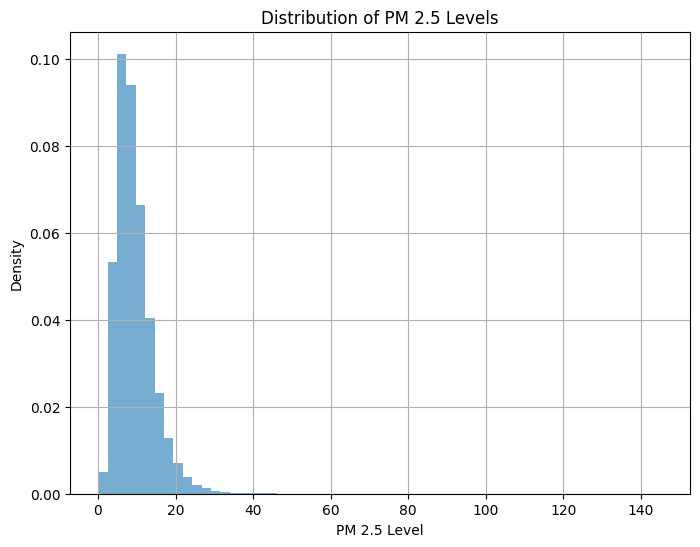

Mean: 9.427446518204672
Median: 8.4599
Skewness: 1.8378926509374716


In [71]:
plt.figure(figsize=(8, 6))
pm['ds_pm_pred'].hist(bins=60, density=True, alpha=0.6)
plt.title('Distribution of PM 2.5 Levels')
plt.xlabel('PM 2.5 Level')
plt.ylabel('Density')
plt.show()

print('Mean:', pm['ds_pm_pred'].mean())
print('Median:', pm['ds_pm_pred'].median())
print('Skewness:', pm['ds_pm_pred'].skew())


GLM and Nonparametric Method Analysis


X = merged_df[['frp', 'bright_t31', 'Shape_area', 'Shape_length']]

X = sm.add_constant(X)

y = pm['ds_pm_pred']

gamma_model = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
gamma_results = gamma_model.fit()
print(glm_model.summary())

gam_model = pygam.GAM(pm['ds_pm_pred'], merged_fire_geo[['wildfire_var1', 'wildfire_var2', ...]]).gridu(n=100).fit()
print(gam_model.summary())

new_data = pd.DataFrame({'wildfire_var1': [...], 'wildfire_var2': [...], ...})
glm_pred = glm_model.predict(new_data)
gam_pred = gam_model.predict(new_data)


We are trying to predict the pm2.5 level using the wildfire variables after it happened. The features that we are using to predict the pm 2.5 are frp, bright_t31, Shape_area, Shape_length. FRP is the radiant energy emitted by wildfires, this is an important variable because it controls many aspects of the smoke including the amount of emission released into the atmosphere. High FRP values indicate more intense fires and higher levels of combustion, which can lead to increased emissions of particulate matter. Bright_t31 is the brightness temperature that can help in identifying active fires and areas prone to wildfires, which are associated with elevated levels of PM2.5 due to increased combustion. Shape_area and shape_length are the shape of the wildfire, large wildfires with extensive areas can release substantial amounts of pollutants and increase the amount of PM2.5 levels.

We will be using a GLM using the Bayesian methods because it allows the incorporation of prior knowledge, which we already have looking at the right-skewed distribution of the pm2.5. This bayesian method is also useful when there is uncertainty about the parameters, which can be helpful for decision-making and inference.

Knowing that the pm 2.5 is right-skewed, we are thinking about using the gamma distribution because it is often used for modeling continuous, strictly positive data that are right-skewed, making it suitable for variables like PM2.5 concentrations. Gamma regression assumes that the response variable follows a gamma distribution, which provides flexibility in capturing the shape and characteristics of right-skewed data. The logarithmic link function that we are using is also commonly used in gamma regression models because it ensures that predicted values are positive, which is suitable for response variables in our model which is pm 2.5. This link function helps capture the non-linear relationship between predictors and the response variable.

We will also be using random forests for the nonparametric method because it doesn't assume a specific parametric form for the relationship between predictors and the response variable, making it flexible and robust to complex relationships. It can handle nonlinearities, interactions, and high-dimensional data, which is beneficial when modeling PM2.5 levels. Random forest is commonly used and often yielding accurate predictions without requiring assumptions like linearity or normality.

How will you evaluate each model’s performance?
We will be using AIC for the GLM to find which variables are significantly necessary. We are going to use absolute mean error for our lost function in the non-parametric method.

#Results
#Summarize and interpret the results from your models.
#Estimate any uncertainty in your GLM predictions, providing clear quantitative state-
ments of the uncertainty in plain English.